# Sarcasm Detection

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_json('../Dataset/Sarcasm_Headlines_Dataset_v2.json',lines = True)


In [5]:
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [6]:
df = data.drop('article_link',axis  = 1)

In [7]:
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [8]:
df.shape

(28619, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
dtypes: int64(1), object(1)
memory usage: 447.3+ KB


In [10]:
df.isnull().sum()

is_sarcastic    0
headline        0
dtype: int64

C:\Users\vicky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

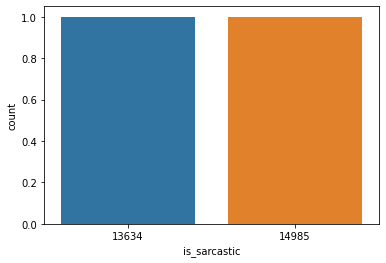

In [11]:
sns.countplot(df['is_sarcastic'].value_counts())

In [12]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import spacy

In [13]:
nlp = spacy.load('en_core_web_sm')
def preprocess(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma.lower() for lemma in lemmas if lemma.isalpha() and lemma not in stopwords.words('english')]
    lemmatized_text = ' '.join(a_lemmas)
    return lemmatized_text

In [14]:
cleaned_text = []
for text in df.headline:
    cleaned_text.append(preprocess(text))
df['clean_text'] = cleaned_text

In [15]:
df.head()

,is_sarcastic,headline,clean_text
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientist unveil doomsday cloc...
1,0,dem rep. totally nails why congress is falling...,dem rep totally nail congress fall short gende...
2,0,eat your veggies: 9 deliciously different recipes,eat veggie deliciously different recipe
3,1,inclement weather prevents liar from getting t...,inclement weather prevent liar get work
4,1,mother comes pretty close to using word 'strea...,mother come pretty close use word streaming co...


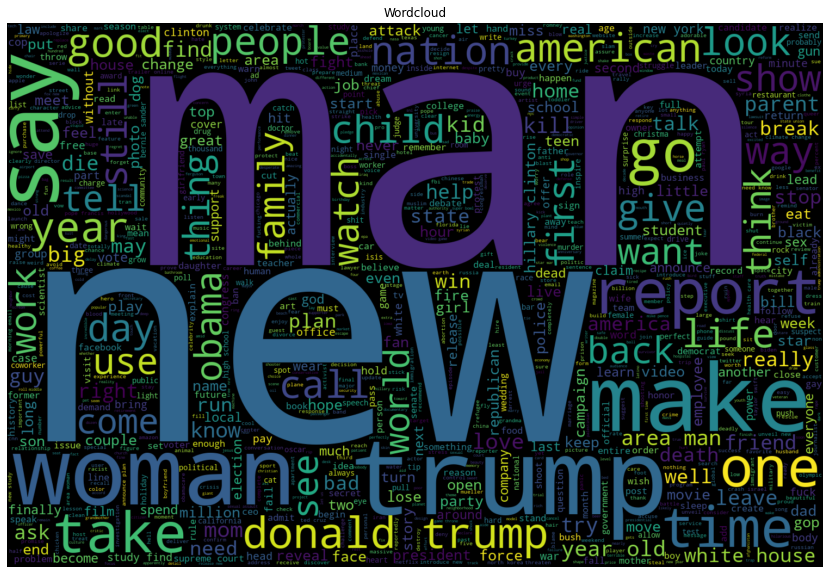

In [16]:
from wordcloud import WordCloud
plt.figure(figsize = (20,10))
wc = WordCloud(width = 1500,height = 1000,max_words = 1000).generate(' '.join(word for word in df.clean_text))
plt.axis("off")
plt.title('Wordcloud')
plt.imshow(wc , interpolation = 'bilinear')

In [17]:
X = df.clean_text
y = df.is_sarcastic

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [21]:
tfidf = TfidfVectorizer(ngram_range = (1,3))
X_tfidf_train = tfidf.fit_transform(X_train.tolist())
X_tfidf_test = tfidf.transform(X_test.tolist())

In [22]:
X_train.head()

12170    american express offer month paternity materni...
28552        watch dolphin knock stand paddleboarder board
6883                          man enjoy thing inform wrong
28387    jonathan lipnicki star young dark helmet space...
12932    publicist worry kanye west support trump damag...
Name: clean_text, dtype: object

**Logistic Regression**

In [23]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_tfidf_train,y_train)

LogisticRegression(class_weight='balanced')

In [24]:
y_pred_lr = lr.predict(X_tfidf_test)
print_metrices(y_pred_lr,y_test)

[[3447 1008]
 [ 981 3150]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      4455
           1       0.76      0.76      0.76      4131

    accuracy                           0.77      8586
   macro avg       0.77      0.77      0.77      8586
weighted avg       0.77      0.77      0.77      8586

Accuracy :  0.7683438155136268
Precison :  0.7683085634990925
Recall :  0.7683438155136268
F1 :  0.7683185863815283


**Naive Bayes**

In [25]:
clf_nb = MultinomialNB()
clf_nb.fit(X_tfidf_train,y_train)
y_pred_nb = clf_nb.predict(X_tfidf_test)
print_metrices(y_pred_nb,y_test)

[[3859  596]
 [1237 2894]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      4455
           1       0.83      0.70      0.76      4131

    accuracy                           0.79      8586
   macro avg       0.79      0.78      0.78      8586
weighted avg       0.79      0.79      0.78      8586

Accuracy :  0.786512928022362
Precison :  0.7988805823231525
Recall :  0.786512928022362
F1 :  0.7883271737832268


**LinearSVC**

In [26]:
from sklearn.svm import LinearSVC
svc =  LinearSVC(C= 10,random_state=42,class_weight='balanced')
svc.fit(X_tfidf_train,y_train)
y_pred_svc = svc.predict(X_tfidf_test)
print_metrices(y_pred_svc,y_test)

[[3555  900]
 [ 884 3247]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      4455
           1       0.78      0.79      0.78      4131

    accuracy                           0.79      8586
   macro avg       0.79      0.79      0.79      8586
weighted avg       0.79      0.79      0.79      8586

Accuracy :  0.7922198928488237
Precison :  0.7921975838480744
Recall :  0.7922198928488237
F1 :  0.7922059852511761


**Decision Tree**

In [27]:
clf_dt = DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=6, random_state=42)
clf_dt.fit(X_tfidf_train, y_train)
y_pred_dt = clf_dt.predict(X_tfidf_test)
print_metrices(y_pred_dt,y_test)

[[4298  157]
 [3319  812]]
              precision    recall  f1-score   support

           0       0.56      0.96      0.71      4455
           1       0.84      0.20      0.32      4131

    accuracy                           0.60      8586
   macro avg       0.70      0.58      0.52      8586
weighted avg       0.70      0.60      0.52      8586

Accuracy :  0.595154903331004
Precison :  0.8780615116666052
Recall :  0.595154903331004
F1 :  0.6676366631332434


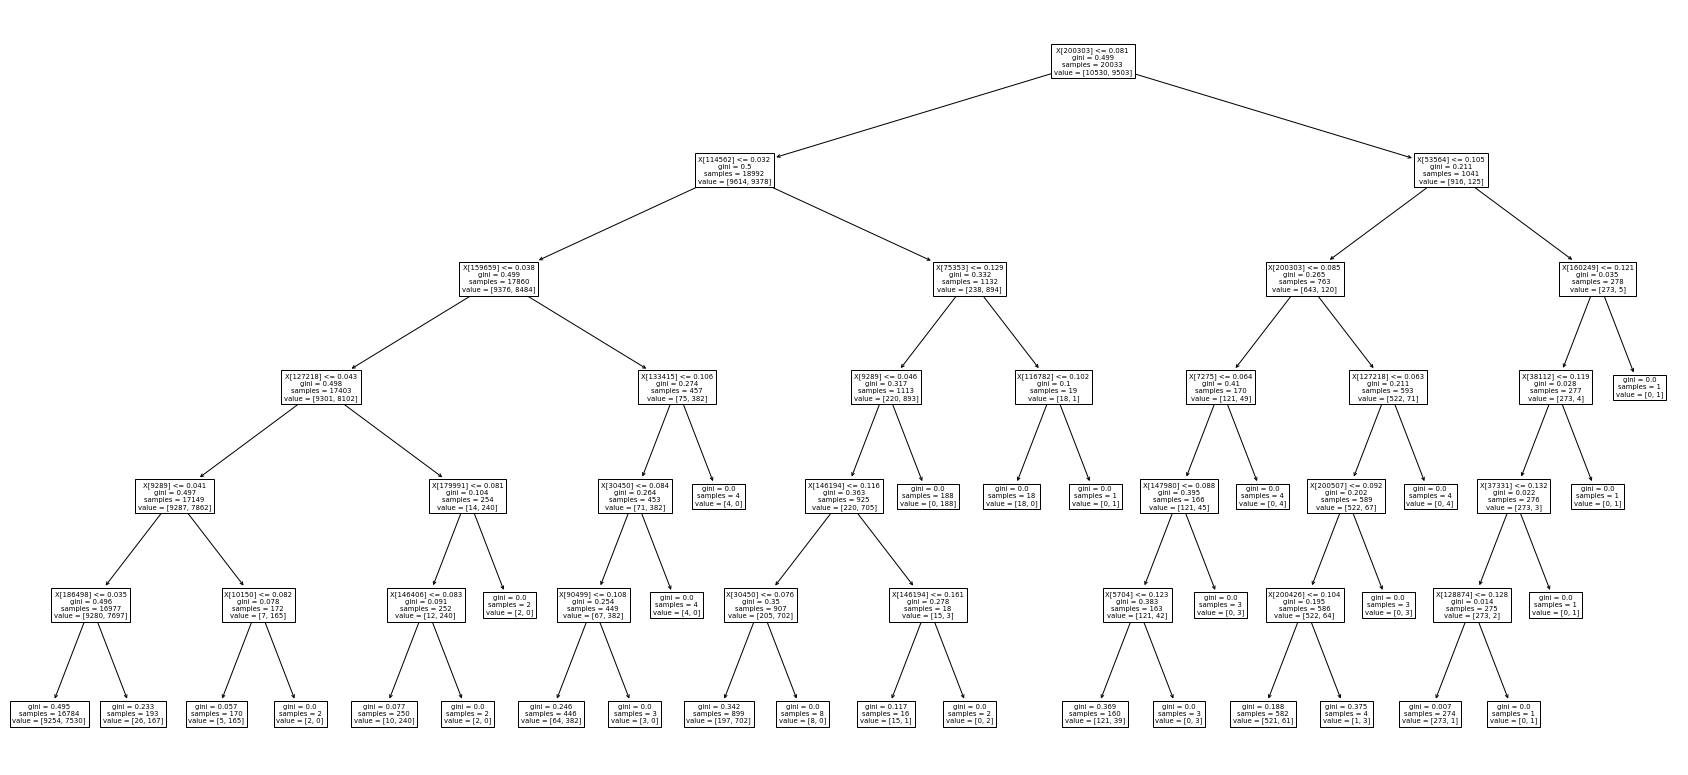

In [28]:
from sklearn import tree
plt.figure(figsize = (30,14))
tree.plot_tree(clf_dt)
plt.show()


In [29]:
acc_table = {
    'Logistic Regression' : accuracy_score(y_pred_lr,y_test),
    'LinearSVC' : accuracy_score(y_pred_svc,y_test),
    'Decision Tree' : accuracy_score(y_pred_dt,y_test),
    'Naive Bayes' : accuracy_score(y_pred_nb,y_test),

}

In [30]:
acc_df = pd.DataFrame(acc_table.items(),columns = ['Model','Accuracy'])

<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

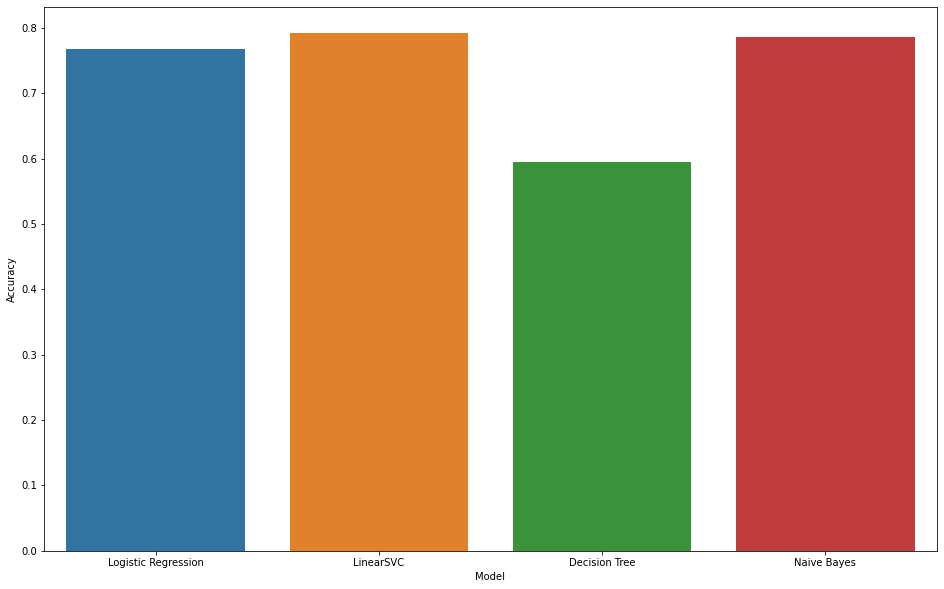

In [31]:
# fig, ax = plt.subplots()
plt.figure(figsize = (16,10))
sns.barplot(x=acc_df['Model'], y=acc_df['Accuracy'], data=acc_df)

## Conclusion


The conclusion that can be drawn after performing the experiment is that when the models trained they provide the following accuracies:

* Liner Regression: 0.7686932215234102
* Decision Tree: 0.5950384346610762
* Naive Bayes: 0.7866293966922898
* Linear SVC: 0.7904728627999068

Hence,we can conlcude that
Naive Bayes and Linear SVC has almost same accuracy for Sracasm Detection.



